In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1.DataSet

In [10]:
x, y = make_regression(n_samples = 100, n_features = 2, noise = 10)

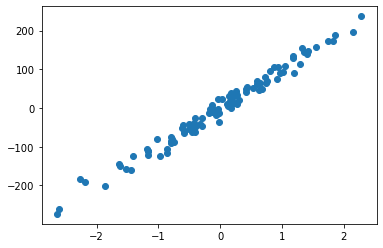

In [11]:
plt.scatter(x[:,0], y)

In [12]:
print(x.shape)
'''
on doit redimensionner le vecteur y car quand on utilise la 
fonction make_regression les dimensions de y ne sont pas 
complètes.
'''
y = y.reshape(100,1)
print(y.shape)

(100, 2)
(100, 1)


In [17]:
#la matrice X qui contient la colonne de biais ( la colonne 1,1,1...)
X = np.hstack((x, np.ones((x.shape[0], 1))))# cette fonction permet de coller deux matrices numpy de mm nombre de lignes
X.shape


(100, 3)

In [18]:
X

array([[ 0.9316492 ,  1.43064367,  1.        ],
       [-1.17055043,  0.42315907,  1.        ],
       [-0.41391197,  0.99396965,  1.        ],
       [-0.79724971, -0.26064954,  1.        ],
       [-0.04081157,  0.59015328,  1.        ],
       [ 0.7354769 , -0.1334625 ,  1.        ],
       [ 1.31624246,  1.97980932,  1.        ],
       [-2.61489107, -0.13699297,  1.        ],
       [ 0.72488392,  0.14131857,  1.        ],
       [-2.27103927,  1.00794554,  1.        ],
       [ 0.59815908,  0.21187318,  1.        ],
       [-0.02551287, -2.21670582,  1.        ],
       [-0.74813117, -0.90745013,  1.        ],
       [-2.6409473 , -0.33947119,  1.        ],
       [ 0.03404316,  1.61473899,  1.        ],
       [ 0.96491309, -0.03475313,  1.        ],
       [ 0.52701987,  0.34991765,  1.        ],
       [ 1.41595281,  0.74978414,  1.        ],
       [ 0.2264268 ,  0.19805171,  1.        ],
       [ 0.76031606, -1.55439698,  1.        ],
       [-0.04317547,  1.16866848,  1.   

In [20]:
#le vecteur theta
theta = np.random.randn(3,1)
theta

array([[ 1.76758442],
       [ 0.39844709],
       [-1.12682219]])

# 2.Modèle

In [21]:
def model(X, theta):
    return X.dot(theta )

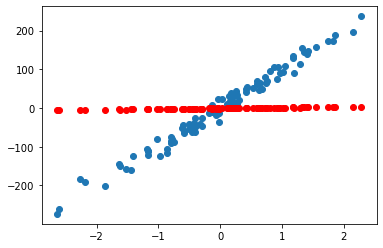

In [25]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], model(X, theta), c = 'r')

In [26]:
theta

array([[ 1.76758442],
       [ 0.39844709],
       [-1.12682219]])

# 3.Fonction cout

In [27]:
# l'erreur quadratique moyenne
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)- y)**2)

In [28]:
cost_function(X, y, theta)

4876.617078434506

# 4.Descente de gradient

In [29]:
def grad(X, y, theta):
    m = len(y)
    return 1/(2*m) * X.T.dot(model(X, theta) - y)

In [30]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history
        

# 5.Entrainement du modèle

In [36]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate = 0.02, n_iterations = 1000 )
theta_final

array([[98.52774732],
       [11.08579747],
       [ 1.30527318]])

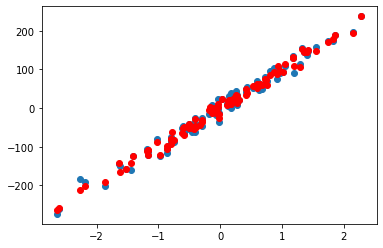

In [37]:
prediction = model(X, theta_final)
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], prediction, c='r')

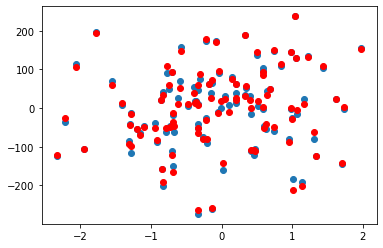

In [38]:
plt.scatter(x[:, 1], y)
plt.scatter(x[:, 1], prediction, c='r')

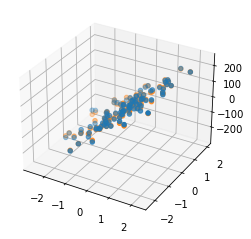

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], prediction)

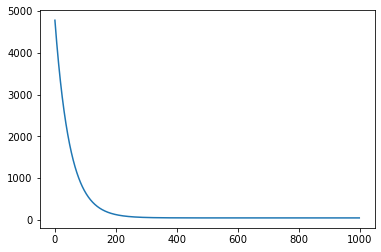

In [42]:
plt.plot(range(1000), cost_history)

# Coefficient de détermination

In [43]:
def coef_determination(y, pred):
    u = ((y- pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [44]:
coef_determination(y, prediction)

0.9906348810491017